In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

### Quick glance at the report for the month

In [2]:
df = pd.read_csv('cosmetic.csv')
df.head(6)

,date,client,procedure,salon
0,02/05/16,Haxe,Shampoo/Cut & Style Dry,Elegant
1,02/05/16,Sheremet,Bamboo Massage,Radisson Blu
2,02/05/16,Gevorgyan,Elemis AromaSpa Seaweed Massage,Radisson Blu
3,02/05/16,Boorlyk,Acrylic Nails,Radisson Blu
4,02/05/16,Zavorotnikh,Elemis Total Glow Tanning Treatment,Elegant
5,03/05/16,Drozd,Island Braiding/Cornrows,Elegant


### Quick glance at the prices of the procedure

In [3]:
df_price = pd.read_csv('procedure_price.csv')
df_price.head(5)

,Type,Name,Price
0,Massage,Acupuncture,$150
1,Massage,Swedish Massage,$75
2,Massage,Thai Herbal Poultice,$195
3,Massage,Bamboo Massage,$159
4,Massage,Couples Massage,$269


### The most popular procedure

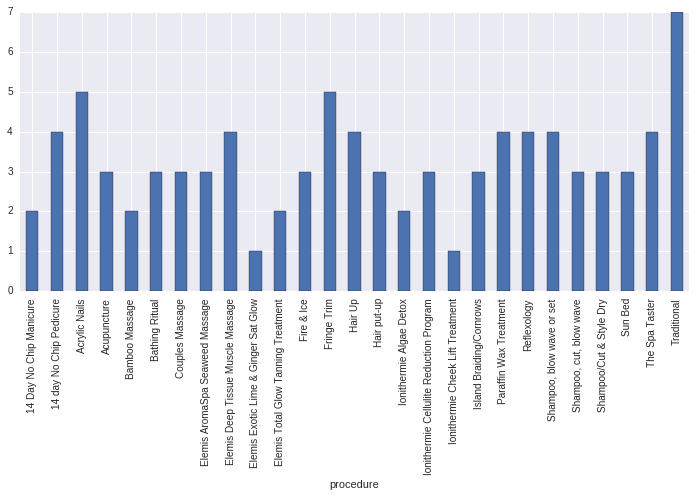

In [17]:
#The most popular procedure in both salons
pop_procedure = df.groupby('procedure').size()
plt.figure(figsize=(12,5))
pop_procedure.plot(kind='bar')

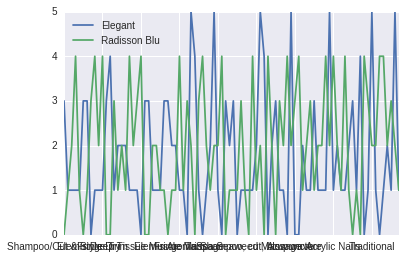

In [18]:
#The most popular procedure in each of the salons
procedures = df['procedure']

#First salon
salon_1 = []

for elem in procedures:
    score = 0
    for row in df['procedure'][df['salon'] == 'Elegant']:
        if elem in row:
            score +=1
        else:
            continue
    salon_1.append(score)

#Second salon
salon_2 = []

for elem in procedures:
    score = 0
    for row in df['procedure'][df['salon'] == 'Radisson Blu']:
        if elem in row:
            score +=1
        else:
            continue
    salon_2.append(score)

#Create a DataFrame
data = {'Elegant': salon_1,
        'Radisson Blu': salon_2}
df_count = pd.DataFrame(data, columns=['Elegant', 'Radisson Blu'], index=list(procedures))

#Build graf
plt.figure(figsize=(20,5))
df_count.plot()

### Сustomer analysis 

In [21]:
#When was the client? V1
df_new = df[['client', 'date', 'procedure']]
df_cl = df_new.set_index(df_new['client'])
df_new = df_cl.drop('client', axis = 1)
df_new.ix['Haxe']

,date,procedure
client,,
Haxe,02/05/16,Shampoo/Cut & Style Dry
Haxe,05/05/16,"Shampoo, cut, blow wave"


In [22]:
#When was the client? V2
df_1 = df.set_index(df['client'])
df_1[['date', 'procedure']].ix['Haxe']

,date,procedure
client,,
Haxe,02/05/16,Shampoo/Cut & Style Dry
Haxe,05/05/16,"Shampoo, cut, blow wave"


In [23]:
#Regular clients
reg_client = df.groupby('client').size()
reg_client[reg_client >= 3]

client
Arbuzov         3
Avagyan         3
Barda           3
Boorlyk         3
Drozd           3
Gerwyn          3
Gevorgyan       5
Kann            3
Kisly           3
Martens         4
Sheremet        5
Shpirka         3
Zavorotnikh     3
Zhidkih         3
Zvjagintseva    3
dtype: int64

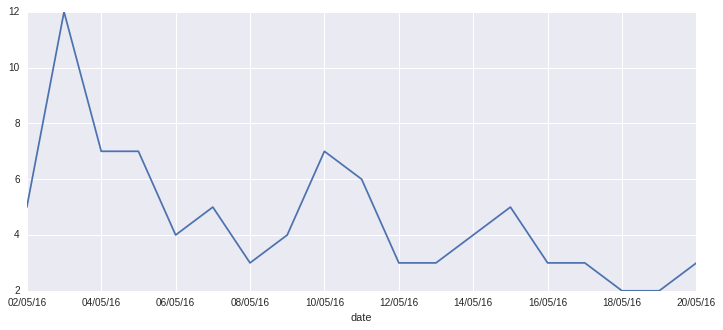

In [12]:
#How many clients come every day?
date_cl = df.groupby('date').size()
plt.figure(figsize=(12,5))
date_cl.plot()
